In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


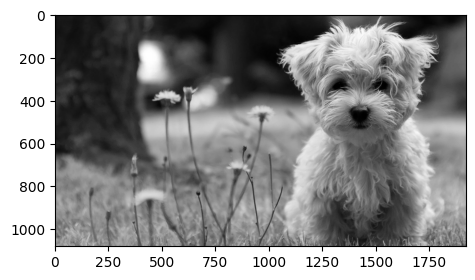

In [ ]:
from google.colab.patches import cv2_imshow
path='/content/drive/MyDrive/Uni/tmu/vision/hapoo.jpg'
image=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#cv2_imshow(image)
plt.figure(figsize=(6,3))
plt.imshow(image,cmap='gray')

problem 1

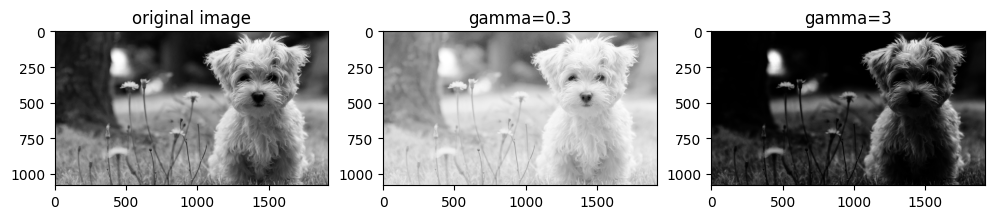

In [ ]:
gamma1=0.3
gamma2=3.0

new_image1=np.power(image,gamma1)
new_image2=np.power(image,gamma2)

plt.figure(figsize=(12,6))
plt.subplot(131),plt.imshow(image,cmap='gray'),plt.title('original image')
plt.subplot(132),plt.imshow(new_image1,cmap='gray'),plt.title('gamma=0.3')
plt.subplot(133),plt.imshow(new_image2,cmap='gray'),plt.title('gamma=3')
plt.show()

problem 2

In [ ]:
print(image.shape)

(1080, 1920)


In [ ]:
plane_list=[]
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    plane_list.append(np.binary_repr(image[i][j],width=8))

print(plane_list[0:5])

['00010110', '00010110', '00010110', '00010110', '00010110']


In [ ]:
eight_bit_plane=(np.array([int(i[0]) for i in plane_list],dtype=np.uint8)*128).reshape(image.shape[0],image.shape[1])
seven_bit_plane=(np.array([int(i[1]) for i in plane_list],dtype=np.uint8)*64).reshape(image.shape[0],image.shape[1])
six_bit_plane=(np.array([int(i[2]) for i in plane_list],dtype=np.uint8)*32).reshape(image.shape[0],image.shape[1])
five_bit_plane=(np.array([int(i[3]) for i in plane_list],dtype=np.uint8)*16).reshape(image.shape[0],image.shape[1])
four_bit_plane=(np.array([int(i[4]) for i in plane_list],dtype=np.uint8)*8).reshape(image.shape[0],image.shape[1])
three_bit_plane=(np.array([int(i[5]) for i in plane_list],dtype=np.uint8)*4).reshape(image.shape[0],image.shape[1])
two_bit_plane=(np.array([int(i[6]) for i in plane_list],dtype=np.uint8)*2).reshape(image.shape[0],image.shape[1])
one_bit_plane=(np.array([int(i[7]) for i in plane_list],dtype=np.uint8)*1).reshape(image.shape[0],image.shape[1])

(<matplotlib.image.AxesImage at 0x7fa3d86f9690>, Text(0.5, 1.0, 'bit plane 1'))

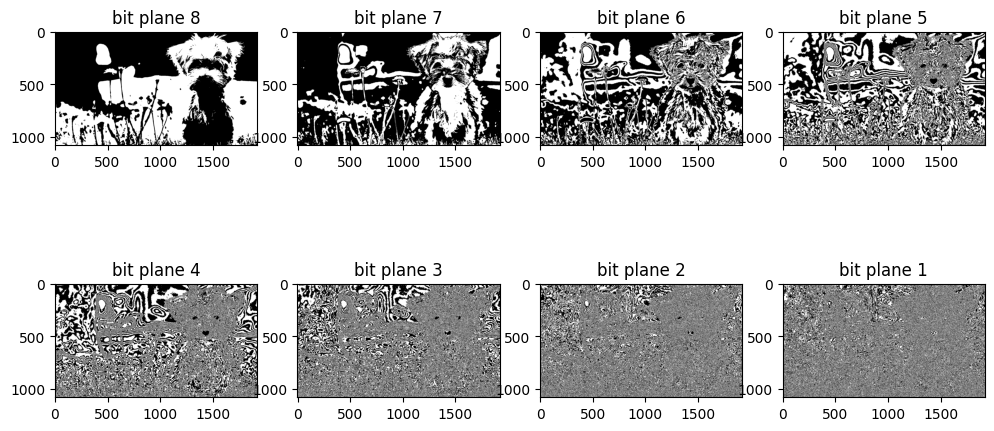

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes[0, 0].imshow(cv2.normalize(eight_bit_plane,np.zeros(image.shape),0,255,cv2.NORM_MINMAX),cmap='gray'),axes[0,0].set_title('bit plane 8')
axes[0, 1].imshow(cv2.normalize(seven_bit_plane,np.zeros(image.shape),0,255,cv2.NORM_MINMAX),cmap='gray'),axes[0,1].set_title('bit plane 7')
axes[0, 2].imshow(cv2.normalize(six_bit_plane,np.zeros(image.shape),0,255,cv2.NORM_MINMAX),cmap='gray'),axes[0,2].set_title('bit plane 6')
axes[0, 3].imshow(cv2.normalize(five_bit_plane,np.zeros(image.shape),0,255,cv2.NORM_MINMAX),cmap='gray'),axes[0,3].set_title('bit plane 5')
axes[1, 0].imshow(cv2.normalize(four_bit_plane,np.zeros(image.shape),0,255,cv2.NORM_MINMAX),cmap='gray'),axes[1,0].set_title('bit plane 4')
axes[1, 1].imshow(cv2.normalize(three_bit_plane,np.zeros(image.shape),0,255,cv2.NORM_MINMAX),cmap='gray'),axes[1,1].set_title('bit plane 3')
axes[1, 2].imshow(cv2.normalize(two_bit_plane,np.zeros(image.shape),0,255,cv2.NORM_MINMAX),cmap='gray'),axes[1,2].set_title('bit plane 2')
axes[1, 3].imshow(cv2.normalize(one_bit_plane,np.zeros(image.shape),0,255,cv2.NORM_MINMAX),cmap='gray'),axes[1,3].set_title('bit plane 1')


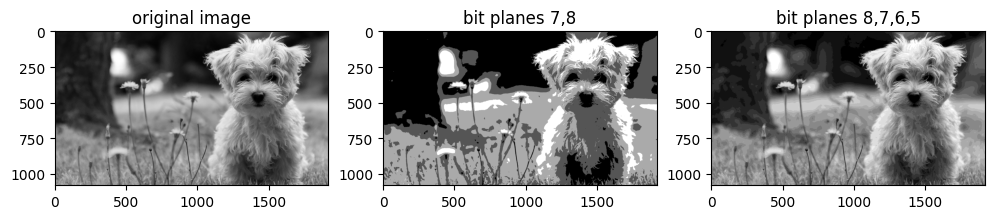

In [ ]:
new_image3=eight_bit_plane+seven_bit_plane
new_image4=eight_bit_plane+seven_bit_plane+six_bit_plane+five_bit_plane

plt.figure(figsize=(12,6))
plt.subplot(131),plt.imshow(image,cmap='gray'),plt.title('original image')
plt.subplot(132),plt.imshow(new_image3,cmap='gray'),plt.title('bit planes 7,8')
plt.subplot(133),plt.imshow(new_image4,cmap='gray'),plt.title('bit planes 8,7,6,5')
plt.show()

problem 3

In [ ]:
gamma1=0.3
gamma2=3.0

new_image1=np.power(image,gamma1).astype(np.uint8)
new_image2=np.power(image,gamma2).astype(np.uint8)

histr_or = cv2.calcHist([image],[0],None,[256],[0,256])
equalized_image = cv2.equalizeHist(image)
histr_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

histr_new1 = cv2.calcHist([new_image1],[0],None,[256],[0,256])
equalized_image_new1 = cv2.equalizeHist(new_image1)
histr_equalized_new1 = cv2.calcHist([equalized_image_new1], [0], None, [256], [0, 256])

histr_new2 = cv2.calcHist([new_image2],[0],None,[256],[0,256])
equalized_image_new2 = cv2.equalizeHist(new_image2)
histr_equalized_new2 = cv2.calcHist([equalized_image_new2], [0], None, [256], [0, 256])

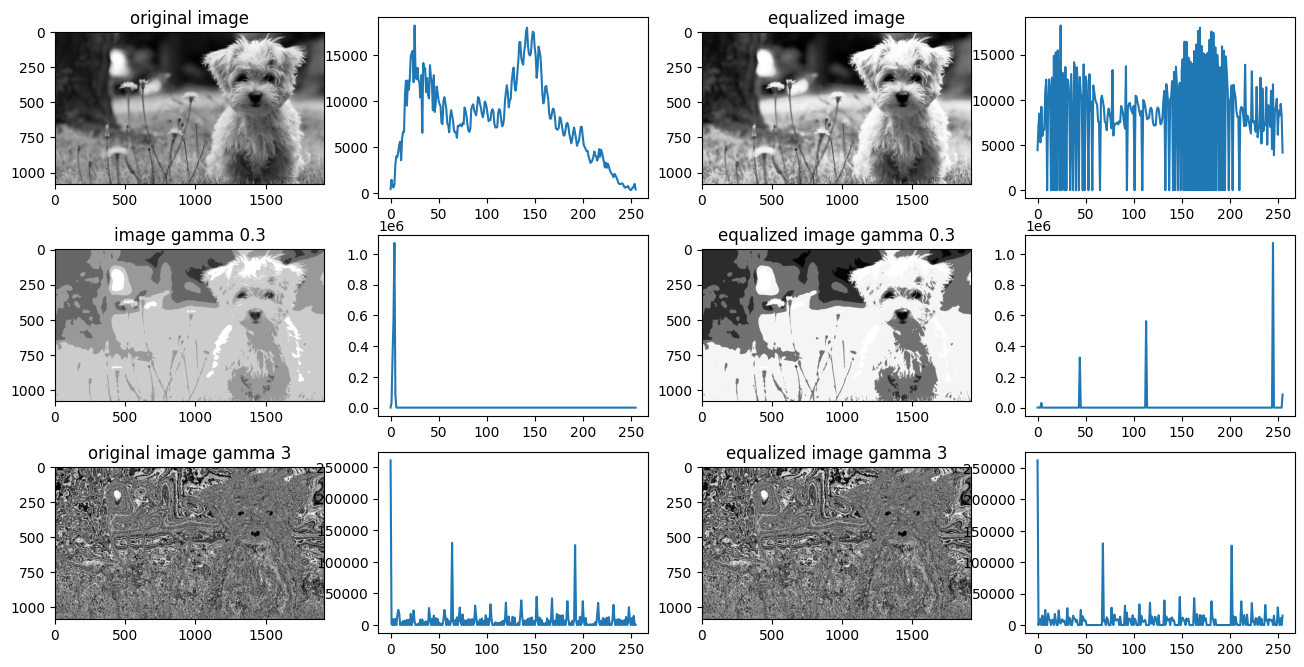

In [ ]:
fig, axes=plt.subplots(3,4,figsize=(16,8))
axes[0,0].imshow(image,cmap='gray'),axes[0,0].set_title('original image')
axes[0,1].plot(histr_or)
axes[0,2].imshow(equalized_image,cmap='gray'),axes[0,2].set_title('equalized image')
axes[0,3].plot(histr_equalized)

axes[1,0].imshow(new_image1,cmap='gray'),axes[1,0].set_title('image gamma 0.3')
axes[1,1].plot(histr_new1)
axes[1,2].imshow(equalized_image_new1,cmap='gray'),axes[1,2].set_title('equalized image gamma 0.3')
axes[1,3].plot(histr_equalized_new1)

axes[2,0].imshow(new_image2,cmap='gray'),axes[2,0].set_title('original image gamma 3')
axes[2,1].plot(histr_new2)
axes[2,2].imshow(equalized_image_new2,cmap='gray'),axes[2,2].set_title('equalized image gamma 3')
axes[2,3].plot(histr_equalized_new2)

part B

step1

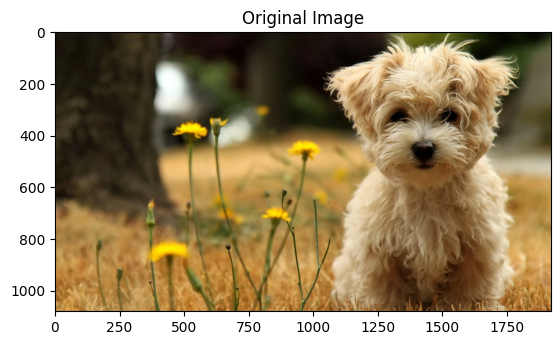

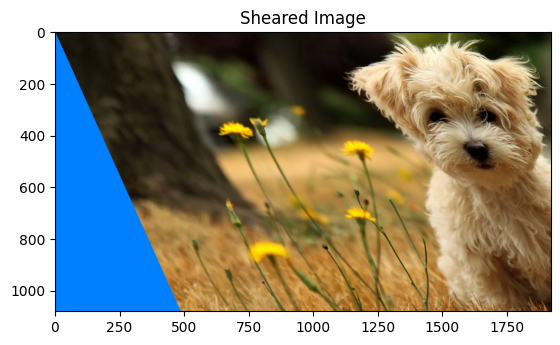

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the shearing factor
a = 0.45

# Load the original image
#A = cv2.imread('football.jpg')
A=cv2.imread(path)

# Get the dimensions of the original image
height, width, channels = A.shape

# Define the affine transformation matrix
M = np.array([[1, a, 0], [0, 1, 0]], dtype=np.float32)

# Apply the affine transformation using warpAffine
B = cv2.warpAffine(A, M, (width, height), borderValue=(255, 127, 0))

# Display the original image
plt.figure()
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Display the sheared image
plt.figure()
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title('Sheared Image')

plt.show()
